In [1]:
import keras

C:\Users\VPL\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
print(keras.__version__)

2.2.2


In [3]:
from keras.datasets import fashion_mnist
from keras import models, layers

In [4]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
model = models.Sequential()
model.add(layers.Dense(
    512, 
    activation="relu",
    input_shape=(28 * 28,)
))
model.add(layers.Dense(
    10,
    activation="softmax"
))
model.summary()

model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [6]:
import matplotlib.pyplot as plt



#first number is the number of shamples
#followed by dimensionality
print('Train', train_images.shape)
print('Test:', test_images.shape)

#print one of my images
#matplot... apply a color map, to change it, we use cmap.
plt.imshow(train_images[0], cmap='gray')
plt.title(str(train_labels[0]))
plt.show()



train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255.0

test_images = test_images.reshape((10000, 28 * 28 ))
test_images = test_images.astype('float32') / 255.0
from keras.utils import to_categorical

print('Before', train_labels[0])
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print('After', train_labels[0])

Train (60000, 28, 28)
Test: (10000, 28, 28)


Before 9
After [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [7]:
#numbers weight and bias al principio are random
model.evaluate(train_images, train_labels)

60000/60000 [==============================] - 9s 145us/step


[2.3509296089172365, 0.17551666666666665]

In [8]:
#import numpy as np
#print(np.max(model.predict(train_images[0:1])))
#print(np.argmax(model.predict(train_images[0:1])))
#print(train_labels[0])

In [9]:
history = model.fit(
    train_images, train_labels,
    epochs=50,
    batch_size=128)

Epoch 1/50
60000/60000 [==============================] - 12s 208us/step - loss: 0.5611 - acc: 0.8015
Epoch 2/50
60000/60000 [==============================] - 16s 259us/step - loss: 0.3810 - acc: 0.8597
Epoch 3/50
60000/60000 [==============================] - 18s 303us/step - loss: 0.3367 - acc: 0.8756
Epoch 4/50
60000/60000 [==============================] - 16s 266us/step - loss: 0.3101 - acc: 0.88430s - loss: 0.3100 - acc: 0.88
Epoch 5/50
60000/60000 [==============================] - 13s 219us/step - loss: 0.2915 - acc: 0.8924
Epoch 6/50
60000/60000 [==============================] - 16s 271us/step - loss: 0.2767 - acc: 0.89782s 
Epoch 7/50
60000/60000 [==============================] - 14s 233us/step - loss: 0.2639 - acc: 0.9019
Epoch 8/50
60000/60000 [==============================] - 14s 232us/step - loss: 0.2534 - acc: 0.9070
Epoch 9/50
60000/60000 [==============================] - 13s 223us/step - loss: 0.2426 - acc: 0.9102
Epoch 10/50
60000/60000 [=========================

{'loss': [0.5610916415214539, 0.38101986298561097, 0.3366509666601817, 0.3100733162879944, 0.2915204461892446, 0.27671759507656096, 0.26392378925482435, 0.2534325129588445, 0.24264582811991373, 0.23370350488821665, 0.2230325310230255, 0.21818155131340028, 0.21017408492565154, 0.20426886240641276, 0.2000188176949819, 0.19169548154274624, 0.1862979867776235, 0.18049955740769705, 0.1763891712665558, 0.17090400706132253, 0.1682315852165222, 0.16423110750516257, 0.15623131978511812, 0.15772179368336994, 0.1502627189397812, 0.14860639001131057, 0.14394219329754512, 0.14033347942034405, 0.1397251762708028, 0.13569609684944153, 0.13176975872913996, 0.13132285960117976, 0.1289080155849457, 0.12404720856746038, 0.12204803977807363, 0.12024769272208213, 0.11838779744505883, 0.11501689530213674, 0.11190631375114123, 0.11267475018501281, 0.1077869745572408, 0.10568396693666776, 0.1062170375486215, 0.1085017935236295, 0.10465989587207636, 0.10026297815541427, 0.10111676947772504, 0.09532498261729876

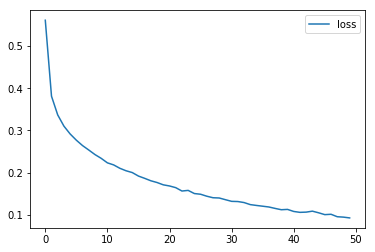

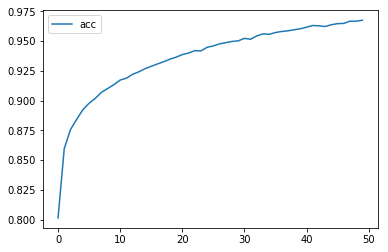

In [10]:
print(history.history)
plt.plot(history.history["loss"], label='loss')
plt.legend()
plt.show()
plt.close()

plt.plot(history.history["acc"], label='acc')
plt.legend()
plt.show()
plt.close()

In [11]:
test_loss, test_acc = model.evaluate(train_images, train_labels)
print(test_loss, test_acc)

60000/60000 [==============================] - 10s 163us/step
0.10514804394656482 0.9640166666666666
